11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28) (60000,)
Test set shape: (10000, 28, 28) (10000,)


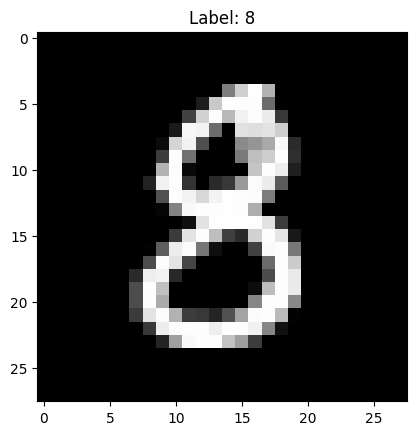

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# Visualize a random image
idx = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[idx], cmap='gray')
plt.title(f"Label: {y_train[idx]}")
plt.show()


In [2]:
# Flatten 28x28 images to 784-length vectors
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel intensities
X_train = X_train / 255.0
X_test = X_test / 255.0

print("After preprocessing:")
print("Train:", X_train.shape, "Test:", X_test.shape)


After preprocessing:
Train: (60000, 784) Test: (10000, 784)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train model (multi-class)
model = LogisticRegression(
    solver='saga',
    max_iter=1000,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.9257
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



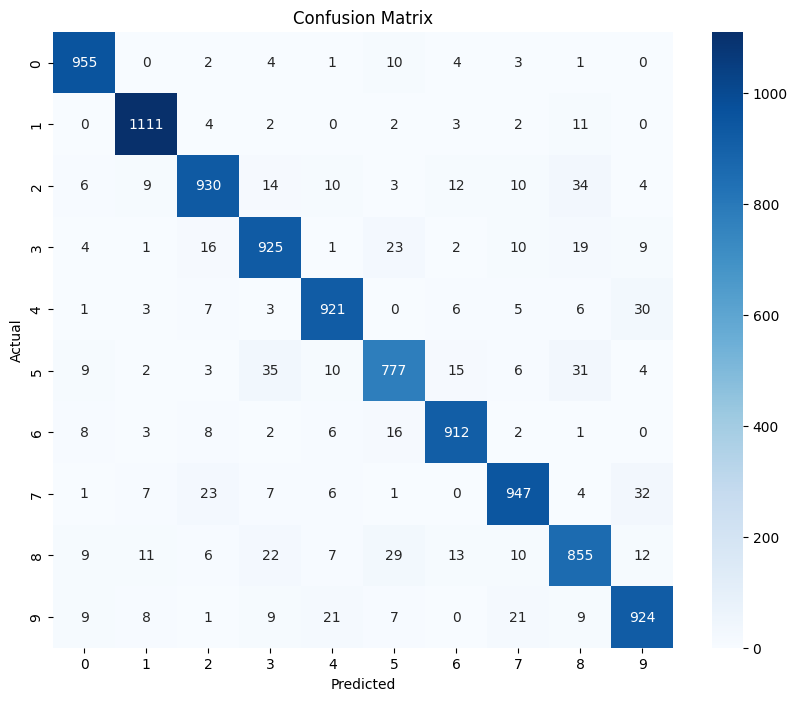

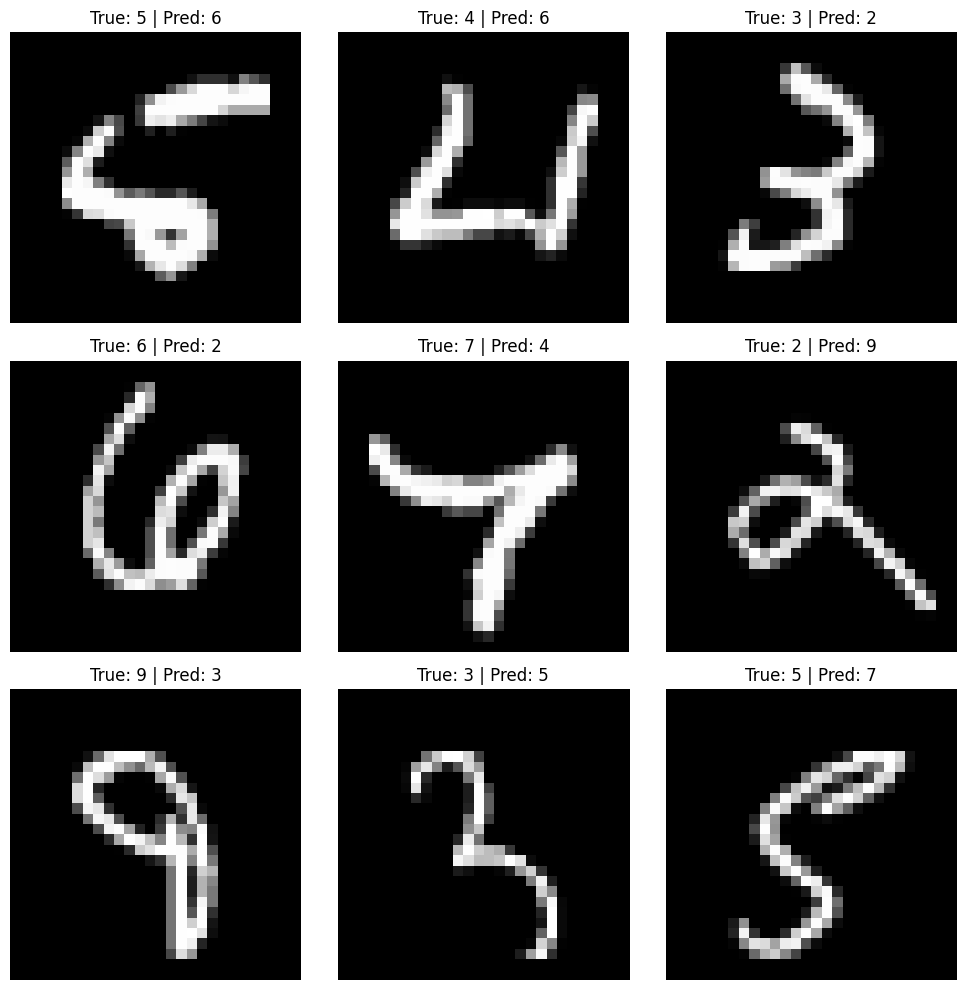

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Display misclassified examples
misclassified = np.where(y_pred != y_test)[0]
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]} | Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
